<div class="alert alert-info" style="border-color: white; border-radius: 10px; background-color: white;"> 
    
# <font color = 'mediumaquamarine'> SQL

<div class="alert alert-info" style="border-color: thistle; border-radius: 10px; background-color: thistle;"> 
    <font color = 'black'> 
        
Тренировочные запросы SQL без подключения к базе данных. На курсе этот проект выполнялся на платформе с автоматической проверкой кода.
        

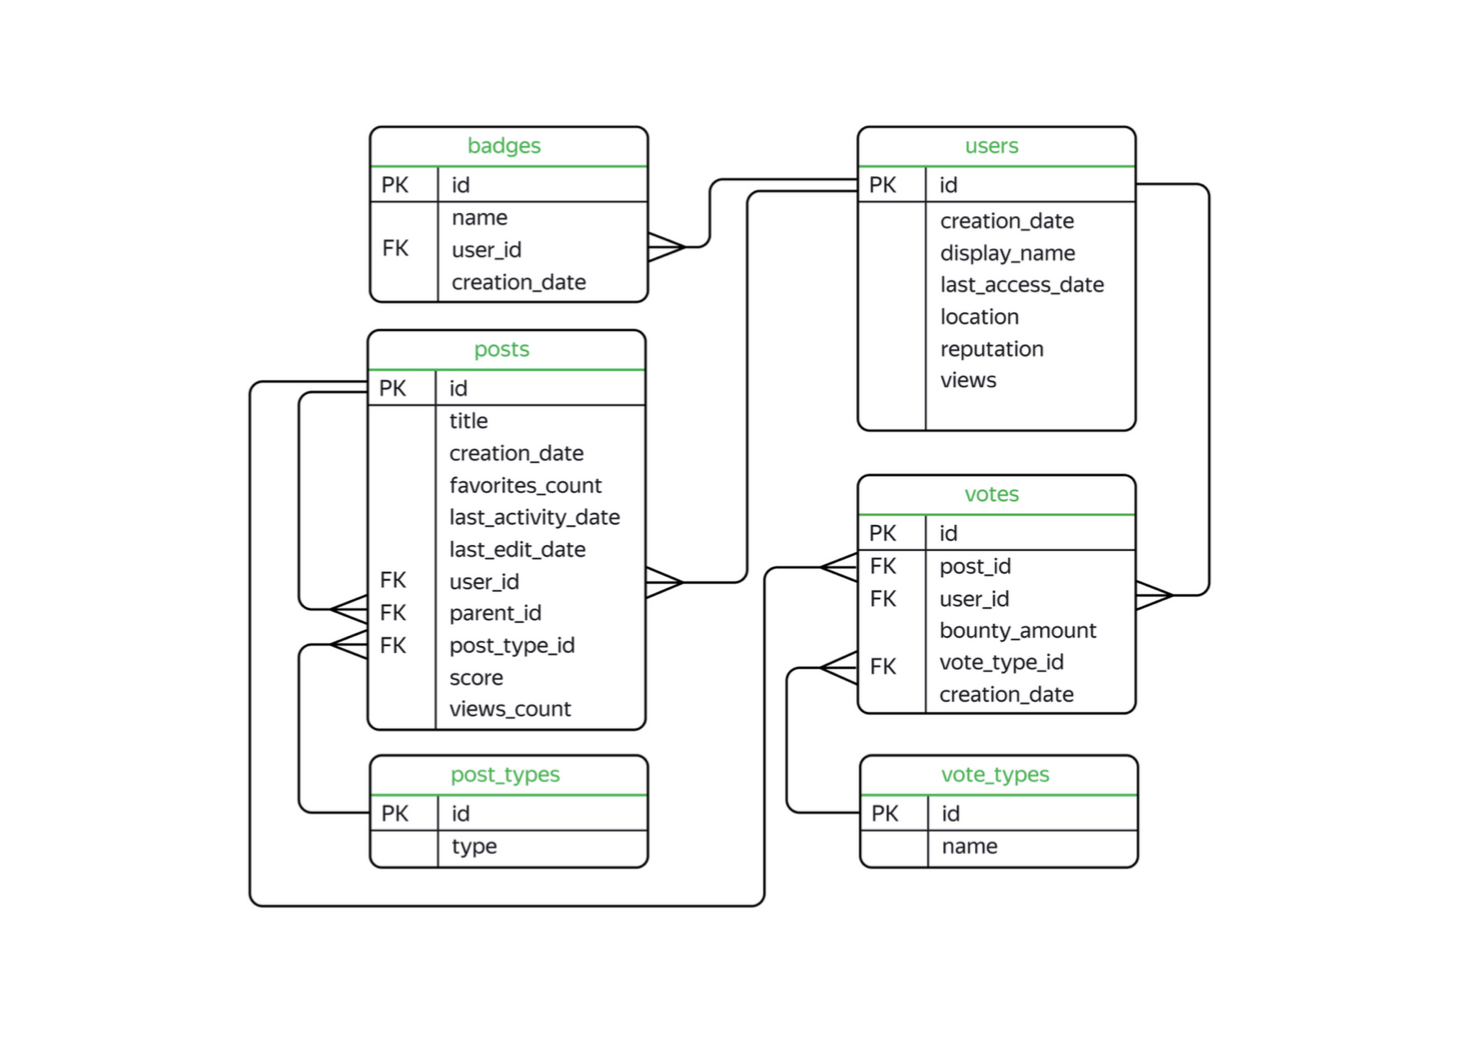

Таблица `stackoverflow.badges`  
Хранит информацию о значках, которые присуждаются за разные достижения. Например, пользователь, правильно ответивший на большое количество вопросов про PostgreSQL, может получить значок postgresql.
- user_id - Идентификатор пользователя, которому присвоили значок, внешний ключ, отсылающий к таблице users
- id - Идентификатор значка, первичный ключ таблицы
- name - Название значка
- creation_date - Дата присвоения значка

Таблица `stackoverflow.post_types`  
Содержит информацию о типе постов. Их может быть два: 
Quastion — пост с вопросом;
Answer — пост с ответом.
- id - Идентификатор поста, первичный ключ таблицы
- type - Тип поста

Таблица `stackoverflow.posts`  
Содержит информацию о постах.
- id - Идентификатор поста, первичный ключ таблицы
- title - Заголовок поста
- creation_date - Дата создания поста
- favorites_count - Число, которое показывает, сколько раз пост добавили в «Закладки»
- last_activity_date - Дата последнего действия в посте, например комментария
- last_edit_date - Дата последнего изменения поста
- user_id	- Идентификатор пользователя, который создал пост, внешний ключ к таблице users
- parent_id - Если пост написали в ответ на другую публикацию, в это поле попадёт идентификатор поста с вопросом
- post_type_id - Идентификатор типа поста, внешний ключ к таблице post_types
- score - Количество очков, которое набрал пост
- views_count - Количество просмотров

Таблица `stackoverflow.users`  
Содержит информацию о пользователях.
- id - Идентификатор пользователя, первичный ключ таблицы
- creation_date - Дата регистрации пользователя
- display_name - Имя пользователя
- last_access_date - Дата последнего входа
- location - Местоположение
- reputation - Очки репутации, которые получают за хорошие вопросы и полезные ответы
- views - Число просмотров профиля пользователя

Таблица `stackoverflow.vote_types`  
Содержит информацию о типах голосов. Голос — это метка, которую пользователи ставят посту. Типов бывает несколько: 
1. UpMod — такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными.
2. DownMod — такую отметку получают посты, которые показались пользователям наименее полезными.
3. Close — такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы.
4. Offensive — такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста.
5. Spam — такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой.

- id - Идентификатор типа голоса, первичный ключ
- name - Название метки

Таблица `stackoverflow.votes`  
Содержит информацию о голосах за посты. 
- id - Идентификатор голоса, первичный ключ
- post_id	- Идентификатор поста, внешний ключ к таблице posts
- user_id	- Идентификатор пользователя, который поставил посту голос, внешний ключ к таблице users
- bounty_amount - Сумма вознаграждения, которое назначают, чтобы привлечь внимание к посту
- vote_type_id - Идентификатор типа голоса, внешний ключ к таблице vote_types
- creation_date - Дата назначения голоса

#### 1. Найдите количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».

In [ ]:
SELECT COUNT (*)
FROM stackoverflow.post_types AS pt 
JOIN stackoverflow.posts AS p ON pt.id = p.post_type_id
WHERE pt.type = 'Question' AND 
(p.favorites_count >= 100 OR p.score > 300);

#### 2. Сколько в среднем в день задавали вопросов с 1 по 18 ноября 2008 включительно? Результат округлите до целого числа.

In [ ]:
WITH frm AS (SELECT COUNT(p.id) AS counts,
       p.creation_date::date
FROM stackoverflow.post_types pt
JOIN stackoverflow.posts p ON pt.id = p.post_type_id
WHERE pt.type = 'Question' AND p.creation_date::date BETWEEN '2008-11-01' AND '2008-11-18'
GROUP BY p.creation_date::date)
SELECT ROUND(AVG(counts))
FROM frm;

#### 3. Сколько пользователей получили значки сразу в день регистрации? Выведите количество уникальных пользователей.

In [ ]:
SELECT COUNT(DISTINCT(u.id))
FROM stackoverflow.users u
JOIN stackoverflow.badges b ON u.id = b.user_id
WHERE u.creation_date::date = b.creation_date::date

#### 4. Сколько уникальных постов пользователя с именем Joel Coehoorn получили хотя бы один голос?

In [ ]:
WITH f AS (SELECT p.id AS id
FROM stackoverflow.posts p
JOIN stackoverflow.users u ON p.user_id = u.id
WHERE u.display_name = 'Joel Coehoorn')
SELECT COUNT(DISTINCT f.id)
FROM f
JOIN stackoverflow.votes v ON v.post_id = f.id

#### 5. Выгрузите все поля таблицы vote_types. Добавьте к таблице поле rank, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю id.

In [ ]:
SELECT *,
       ROW_NUMBER() OVER (ORDER BY id DESC) AS rank
FROM stackoverflow.vote_types
ORDER BY rank DESC

#### 6. Отберите 10 пользователей, которые поставили больше всего голосов типа Close. Отобразите таблицу из двух полей: идентификатором пользователя и количеством голосов. Отсортируйте данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя.

In [ ]:
WITH f AS (SELECT v.user_id AS id,
       COUNT(vt.id) AS cnt
FROM stackoverflow.vote_types vt 
JOIN stackoverflow.votes v ON vt.id = v.vote_type_id
WHERE vt.name = 'Close'
GROUP BY v.user_id)
SELECT f.id,
       f.cnt
FROM f
JOIN stackoverflow.users u ON f.id = u.id
ORDER BY f.cnt DESC, f.id DESC
LIMIT 10;

#### 7. Отберите 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно.
Отобразите несколько полей:
идентификатор пользователя;
число значков;
место в рейтинге — чем больше значков, тем выше рейтинг.
Пользователям, которые набрали одинаковое количество значков, присвойте одно и то же место в рейтинге.
Отсортируйте записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя.

In [ ]:
WITH f AS (SELECT u.id AS id,
       COUNT(b.id) AS cnt
FROM stackoverflow.users u
JOIN stackoverflow.badges b ON u.id = b.user_id
WHERE b.creation_date::date BETWEEN '2008-11-15' AND '2008-12-15'
GROUP BY u.id)
SELECT id,
       cnt,
       DENSE_RANK() OVER (ORDER BY cnt DESC)
FROM f
ORDER BY cnt DESC, 
         id ASC
LIMIT 10; 

#### 8. Сколько в среднем очков получает пост каждого пользователя?
Сформируйте таблицу из следующих полей:
заголовок поста;
идентификатор пользователя;
число очков поста;
среднее число очков пользователя за пост, округлённое до целого числа.
Не учитывайте посты без заголовка, а также те, что набрали ноль очков.

In [ ]:
SELECT p.title,
       p.user_id,
       p.score,
       ROUND(AVG(p.score) OVER (PARTITION BY p.user_id))
FROM stackoverflow.posts p
WHERE p.score != 0 AND title IS NOT NULL;

#### 9. Отобразите заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список.

In [ ]:
WITH f AS (SELECT u.id AS id,
       COUNT(b.id) AS cnt
FROM stackoverflow.users u
JOIN stackoverflow.badges b ON u.id = b.user_id 
GROUP BY u.id)
SELECT p.title
FROM stackoverflow.posts p
JOIN f ON p.user_id = f.id
WHERE f.cnt > 1000 AND p.title IS NOT NULL;

#### 10. Напишите запрос, который выгрузит данные о пользователях из Канады (англ. Canada). 
Разделите пользователей на три группы в зависимости от количества просмотров их профилей:
пользователям с числом просмотров больше либо равным 350 присвойте группу 1;
пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу 2;
пользователям с числом просмотров меньше 100 — группу 3.
Отобразите в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу. Пользователи с количеством просмотров меньше либо равным нулю не должны войти в итоговую таблицу.

In [ ]:
SELECT id,
       views,
       CASE
            when views >= 350 then 1
            when views between 100 and 349 then 2
            when views < 100 then 3
       END
FROM stackoverflow.users
WHERE location LIKE '%Canada%'
      AND views != 0;

#### 11. Дополните предыдущий запрос. 
Отобразите лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. Выведите поля с идентификатором пользователя, группой и количеством просмотров. Отсортируйте таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.

In [ ]:
SELECT id,
       group_number,
       views
FROM (SELECT *,
      MAX(views) OVER (PARTITION BY group_number) AS maxs
      FROM (SELECT id,
                   views,
                   CASE
                     when views >= 350 then 1
                     when views between 100 and 349 then 2
                     when views < 100 then 3
                   END AS group_number
FROM stackoverflow.users
WHERE location LIKE '%Canada%'
      AND views != 0) AS hs) AS lo
WHERE maxs = views
ORDER BY views DESC, id;

#### 12. Посчитайте ежедневный прирост новых пользователей в ноябре 2008 года. 
Сформируйте таблицу с полями:
номер дня;
число пользователей, зарегистрированных в этот день;
сумму пользователей с накоплением.

In [ ]:
SELECT
    EXTRACT(DAY FROM creation_date::date) AS dates,
    COUNT(*) AS cnt,
    SUM(COUNT(*)) OVER (ORDER BY EXTRACT(DAY FROM creation_date::date)) AS sum_cnt
FROM stackoverflow.users
WHERE EXTRACT(MONTH FROM creation_date::date) = 11 AND EXTRACT(YEAR FROM creation_date::date) = 2008
GROUP BY EXTRACT(DAY FROM creation_date::date)
ORDER BY EXTRACT(DAY FROM creation_date::date);

#### 13. Для каждого пользователя, который написал хотя бы один пост, найдите интервал между регистрацией и временем создания первого поста. 
Отобразите:
идентификатор пользователя;
разницу во времени между регистрацией и первым постом.

In [ ]:
WITH f AS (SELECT u.id AS id,
                  u.creation_date AS datesf,
                  p.creation_date AS datesp,
                  ROW_NUMBER () OVER (PARTITION BY u.id ORDER BY p.creation_date) AS rn
           FROM stackoverflow.users u
           JOIN stackoverflow.posts p ON u.id = p.user_id)
SELECT id,
       datesp - datesf 
FROM f
WHERE rn = 1

#### 14. Выведите общую сумму просмотров у постов, опубликованных в каждый месяц 2008 года. 
Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

In [ ]:
SELECT DATE_TRUNC('month', creation_date)::date AS months,
       SUM(views_count) AS viewscnt
FROM stackoverflow.posts
GROUP BY months
ORDER BY viewscnt DESC;

#### 15. Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. 
Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений user_id. Отсортируйте результат по полю с именами в лексикографическом порядке.

In [ ]:
SELECT u.display_name,
COUNT(DISTINCT user_id)
FROM stackoverflow.posts p
JOIN stackoverflow.post_types pt ON p.post_type_id = pt.id
JOIN stackoverflow.users u ON u.id = p.user_id
WHERE DATE_TRUNC('day', p.creation_date) >= DATE_TRUNC('day', u.creation_date)
  AND DATE_TRUNC('day', p.creation_date) <= DATE_TRUNC('day', u.creation_date) + INTERVAL '1 month'
  AND pt.type = 'Answer'
GROUP BY u.display_name
HAVING COUNT(*) > 100
ORDER BY display_name;

#### 16. Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

In [ ]:
SELECT DATE_TRUNC('month', creation_date)::date AS month,
       COUNT(*)
FROM stackoverflow.posts
WHERE user_id IN
    (SELECT DISTINCT u.id
     FROM stackoverflow.users u
     JOIN stackoverflow.posts p ON u.id = p.user_id
     WHERE DATE_TRUNC('month', u.creation_date) = '2008-09-01'
       AND DATE_TRUNC('month', p.creation_date) = '2008-12-01')
GROUP BY month
ORDER BY month DESC;

#### 17. Используя данные о постах, выведите несколько полей:
идентификатор пользователя, который написал пост;
дата создания поста;
количество просмотров у текущего поста;
сумма просмотров постов автора с накоплением.
Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

In [ ]:
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts
ORDER BY user_id 

#### 18. Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат.

In [ ]:
WITH temp_table AS
  (SELECT user_id,
          DATE_TRUNC('day', creation_date) AS day
   FROM stackoverflow.posts
   WHERE DATE_TRUNC('day',creation_date) >= '2008-12-01'
     AND DATE_TRUNC('day',creation_date) <= '2008-12-07'
   GROUP BY user_id,
            day
   ORDER BY user_id,
            day)
SELECT ROUND(AVG(days_count)) AS result
FROM
  (SELECT user_id,
          COUNT(day) AS days_count
   FROM temp_table
   GROUP BY user_id
   ORDER BY user_id) AS temp_table2;

#### 19. На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:
Номер месяца.
Количество постов за месяц.
Процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.
Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

In [ ]:
WITH f AS (SELECT EXTRACT(MONTH FROM creation_date) AS mon,
       COUNT(id) AS cnt
FROM stackoverflow.posts
WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
GROUP BY EXTRACT(MONTH FROM creation_date))
SELECT mon,
       cnt,
       ROUND(((cnt::numeric / LAG(cnt) OVER (ORDER BY mon)) - 1) * 100, 2) AS churn_rate
FROM f

#### 20. Найдите пользователя, который опубликовал больше всего постов за всё время с момента регистрации. Выведите данные его активности за октябрь 2008 года в таком виде: номер недели; дата и время последнего поста, опубликованного на этой неделе.

In [ ]:
WITH pr AS (SELECT DISTINCT user_id AS id,
                  COUNT(id) AS cnt
           FROM stackoverflow.posts 
           GROUP BY user_id
           ORDER BY COUNT(id) DESC
           LIMIT 1),
n AS (SELECT p.user_id,
       p.id,
       p.creation_date AS dates,
       EXTRACT(WEEK FROM p.creation_date) AS week
       FROM stackoverflow.posts p
       JOIN pr ON p.user_id = pr.id
       GROUP BY p.user_id, p.id, p.creation_date)
SELECT week,
       MAX(dates)
FROM n
WHERE EXTRACT(MONTH FROM dates::date) = 10 AND EXTRACT(YEAR FROM dates::date) = 2008
GROUP BY week 